### Data preparation

In [11]:
import torch
import torchaudio
from torchaudio.utils import download_asset
from IPython.display import Audio
import matplotlib.pyplot as plt

In [3]:
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")

In [9]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


### Load audio data

In [15]:
waveform, sampling_rate = torchaudio.load(SAMPLE_WAV)

In [16]:
waveform.shape

torch.Size([1, 54400])

- `sample_rate` is the sampling rate of the audio
- `num_channels` is the number of channels
- `num_frames` is the number of frames per channel
- `bits_per_sample` is bit depth
- `encoding` is the sample coding format

In [19]:
def plot_waveform(waveform, sampling_rate):
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sampling_rate
    
    figure, axes = plt.subplots(num_channels, 1, figsize=(10, 4))
    if num_channels == 1:
        axes = [axes]
    
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        # if num_channels > 1:
        axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

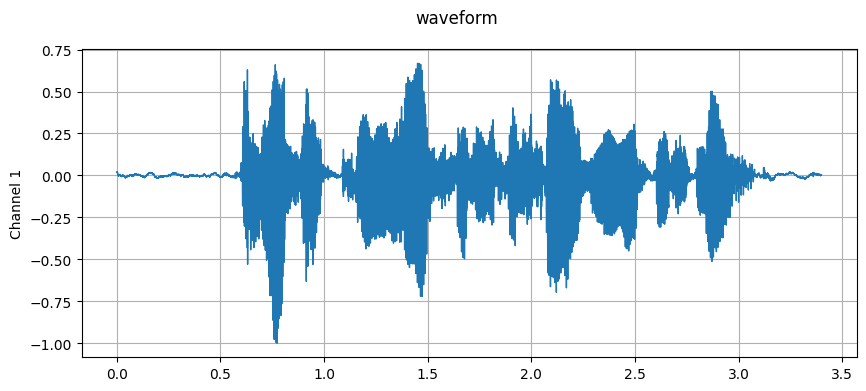

In [20]:
plot_waveform(waveform, sampling_rate)

In [29]:
def plot_specgram(waveform, sampling_rate, title="Spectrogram"):
    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sampling_rate)
        axes[c].set_ylabel(f"Channel {c+1}")
    
    figure.suptitle(title)

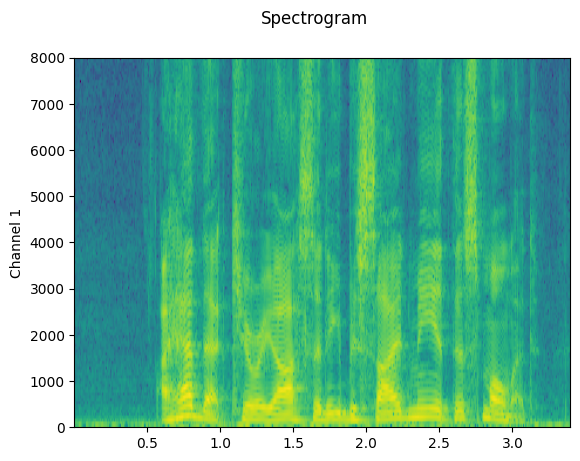

In [30]:
plot_specgram(waveform, sampling_rate)

In [31]:
torchaudio.save('./data/audio-io-data.wav', waveform, sampling_rate)